In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
def step_signal (low, high, s_low=0.1, s_high=0.1, larg_high_i=20, larg_high_f=100, larg_low_i=100, larg_low_f=120, prob_positivo=0.5, n=100):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high-s_high,high+s_high,np.random.randint(larg_high_i, larg_high_f)) if x == 1 else np.random.uniform(low-s_low,low+s_low,np.random.randint(larg_low_i, larg_low_f)) for x in distrib])
    return signal


In [127]:
signal = pd.Series(step_signal(-0.5,0.5,n=10))
print(max(signal), min(signal))
print(signal.mean())

0.5998261224696265 -0.5992316133643341
0.2080492590694434


In [128]:
zero_1 = round((max(signal) + min(signal) )/2,4)

In [129]:
zero = round(signal.mean(),4)

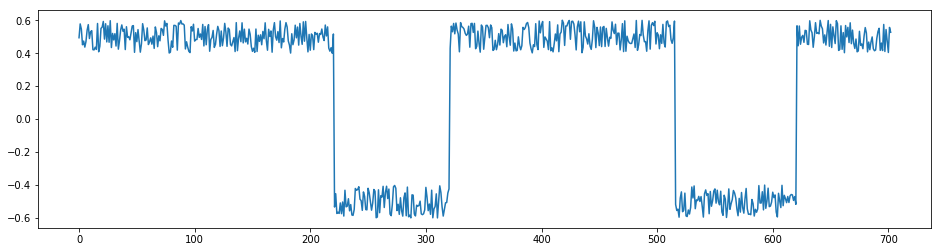

In [130]:
plt.figure(figsize=(16,4))
plt.plot(signal)

In [216]:
def parametros (U):
    #U_max = max(abs(U))
    t = U.abs().idxmax()
    #print(t)
    P = 2*np.exp(-6*max(abs(U)**2)/((len(U)**2)+(len(U)**3)))
    condicao = P < 0.01
    parametros = {
        #'Ut': U_max,
        't': t,
        'P': P,
        'P < a': condicao
        }
    return parametros

In [217]:
def step_1(signal):
    v = pd.Series(index=signal.index)
    for i, s in signal.iteritems():
        v[i] = np.sum(np.sign(s-signal))
    
    return np.cumsum(v)

In [218]:
def step_2(signal,t):
    #print('entreistep')
    signal_1 = signal[0:t]
    signal_2 = signal[t:]
    U1 = step_1(signal_1)
    U2 = step_1(signal_2)
    par_1 = parametros(U1)
    par_2 = parametros(U2)
    if par_1['P < a']:
        print(par_1['t'])
        step_2(signal_1,par_1['t']-t)
    elif par_2['P < a']:
        print(par_2['t'])
        step_2(signal_2,par_2['t']-t)
    else:
        pass


In [219]:
U = step_1(signal)
par = parametros(U)
print(par)
step_2(signal,par['t'])

{'t': 215, 'P': 8.831025741189076e-15, 'P < a': True}
320
515


ValueError: attempt to get argmax of an empty sequence

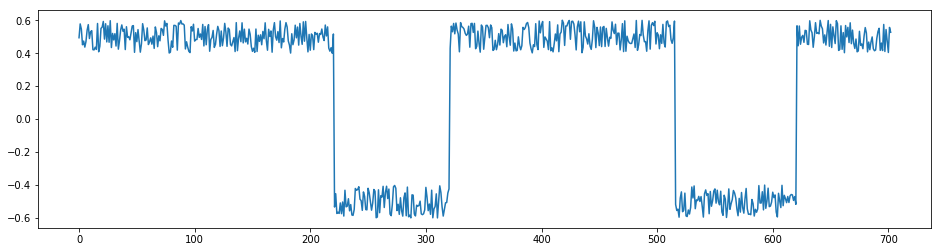

In [220]:
plt.figure(figsize=(16,4))
plt.plot(signal)

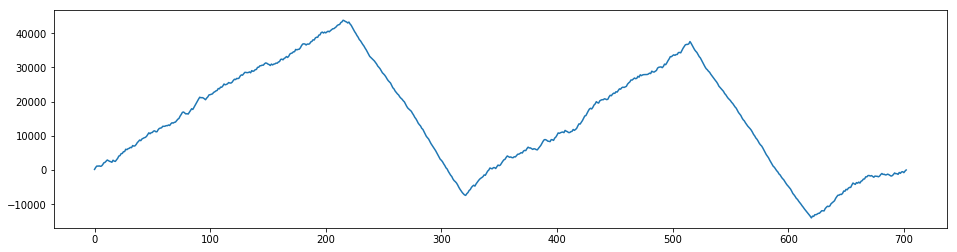

In [139]:
plt.figure(figsize=(16,4))
U = step_1(signal)
plt.plot(U)

In [147]:
par_i  = parametros(U)

t = U.abs().idxmax()

P = 2*np.exp(-6*max(abs(U)**2)/((len(U)**2)+(len(U)**3)))
print(t, P, P < 0.01)
print(parametros(U))
signal_1 = signal[0:t]
signal_2 = signal[t:]

215 8.831025741189076e-15 True
{'t': 215, 'P': 8.831025741189076e-15, 'P < a': True}


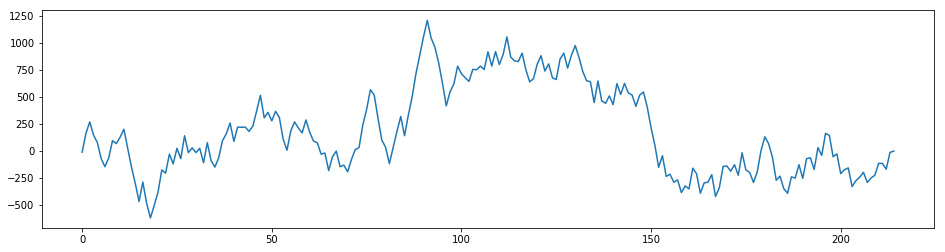

In [148]:
U1 = step_1(signal_1)
plt.figure(figsize=(16,4))
plt.plot(U1)

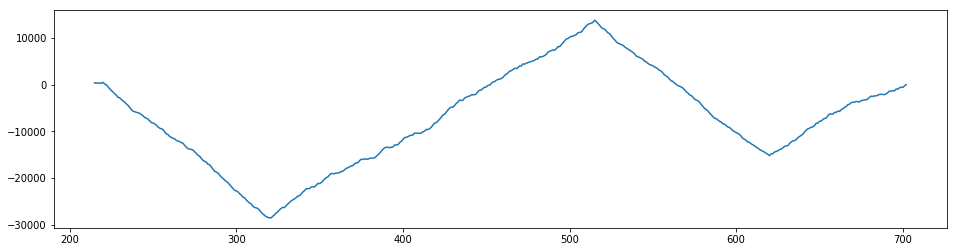

In [149]:
U2 = step_1(signal_2)
plt.figure(figsize=(16,4))
plt.plot(U2)

In [150]:
par_1  = parametros(U1)

t1 = U1.abs().idxmax()

P1 = 2*np.exp(-6*max(abs(U1)**2)/((len(U1)**2)+(len(U1)**3)))
print(t1, P1, P1 < 0.01)
print(parametros(U1))
signal_1_1 = signal_1[0:t1]
signal_1_2 = signal_1[t1:]

91 0.8297193777891275 False
{'t': 91, 'P': 0.8297193777891275, 'P < a': False}


In [185]:
par_2  = parametros(U2)

t2 = U2.abs().idxmax()

P2 = 2*np.exp(-6*max(abs(U2)**2)/((len(U2)**2)+(len(U2)**3)))
print(t2, P2, P2 < 0.01)
print(parametros(U2))
signal_2_1 = signal_2[0:t2-t]
signal_2_2 = signal_2[t2-t:]

320 1.223623379593839e-18 True
{'t': 320, 'P': 1.223623379593839e-18, 'P < a': True}


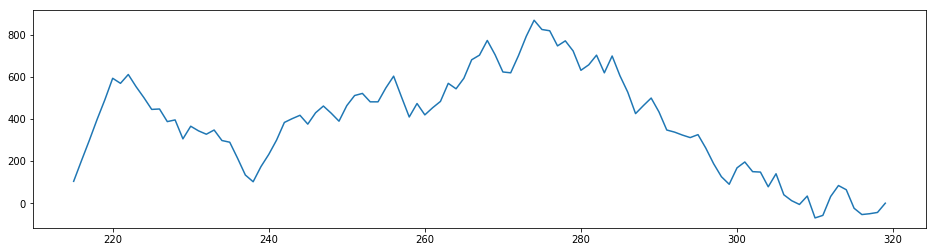

In [192]:
U2_1 = step_1(signal_2_1)
plt.figure(figsize=(16,4))
plt.plot(U2_1)

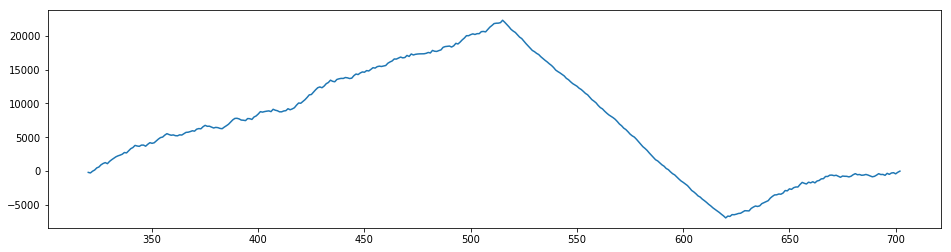

In [193]:
U2_2 = step_1(signal_2_2)
plt.figure(figsize=(16,4))
plt.plot(U2_2)

In [194]:
par_2_1  = parametros(U2_1)

t2_1 = U2_1.abs().idxmax()

P2_1 = 2*np.exp(-6*max(abs(U2_1)**2)/((len(U2_1)**2)+(len(U2_1)**3)))
print(t2_1, P2_1, P2_1 < 0.01)
print(parametros(U2_1))
signal_2_1 = signal_2[0:t2-t]
signal_2_2 = signal_2[t2-t:]

274 0.0410536655256147 False
{'t': 274, 'P': 0.0410536655256147, 'P < a': False}


In [206]:
par_2_2  = parametros(U2_2)

t2_2 = U2_2.abs().idxmax()

P2_2 = 2*np.exp(-6*max(abs(U2_2)**2)/((len(U2_2)**2)+(len(U2_2)**3)))
print(t2_2, P2_2, P2_2 < 0.01)
print(parametros(U2_2))
signal_2_2_1 = signal_2_2[0:t2_2-t2]
signal_2_2_2 = signal_2_2[t2_2-t2:]

515 2.2597816340539635e-23 True
{'t': 515, 'P': 2.2597816340539635e-23, 'P < a': True}


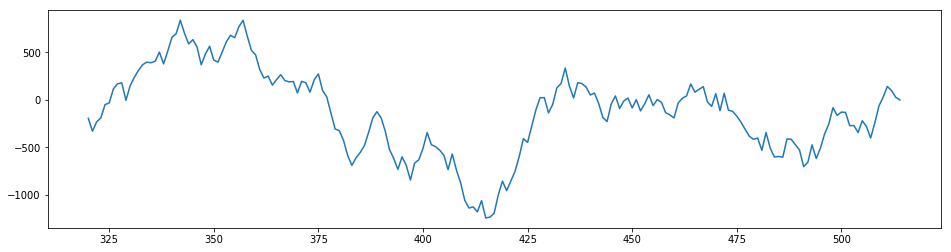

In [207]:
U2_2_1 = step_1(signal_2_2_1)
plt.figure(figsize=(16,4))
plt.plot(U2_2_1)

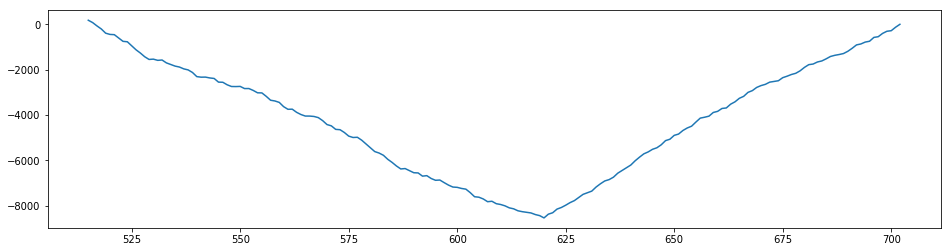

In [208]:
U2_2_2 = step_1(signal_2_2_2)
plt.figure(figsize=(16,4))
plt.plot(U2_2_2)

In [209]:
par_2_2_1  = parametros(U2_2_1)

t2_2_1 = U2_2_1.abs().idxmax()

P2_2_1 = 2*np.exp(-6*max(abs(U2_2_1)**2)/((len(U2_2_1)**2)+(len(U2_2_1)**3)))
print(t2_2_1, P2_2_1, P2_2_1 < 0.01)
print(parametros(U2_2_1))
signal_2_2_1 = signal_2_2[0:t2_2-t2]
signal_2_2_2 = signal_2_2[t2_2-t2:]

415 0.5753909393173523 False
{'t': 415, 'P': 0.5753909393173523, 'P < a': False}


In [211]:
par_2_2_2  = parametros(U2_2_2)

t2_2_2 = U2_2_2.abs().idxmax()

P2_2_2 = 2*np.exp(-6*max(abs(U2_2_2)**2)/((len(U2_2_2)**2)+(len(U2_2_2)**3)))
print(t2_2_2, P2_2_2, P2_2_2 < 0.01)
print(parametros(U2_2_2))
signal_2_2_2_1 = signal_2_2_2[0:t2_2_2-t2_2]
signal_2_2_2_2 = signal_2_2_2[t2_2_2-t2_2:]

620 7.554907730246699e-29 True
{'t': 620, 'P': 7.554907730246699e-29, 'P < a': True}


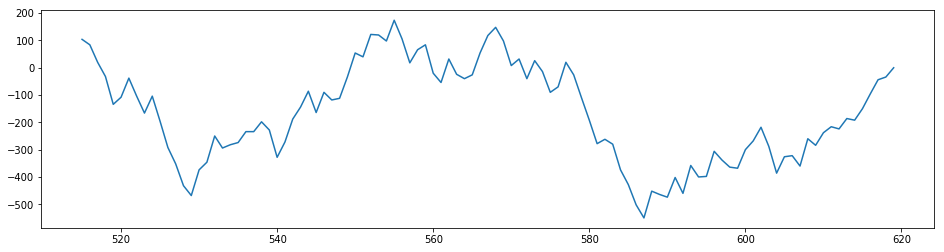

In [212]:
U2_2_2_1 = step_1(signal_2_2_2_1)
plt.figure(figsize=(16,4))
plt.plot(U2_2_2_1)

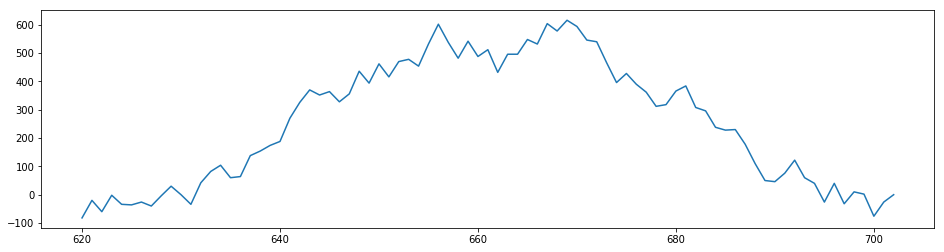

In [213]:
U2_2_2_2 = step_1(signal_2_2_2_2)
plt.figure(figsize=(16,4))
plt.plot(U2_2_2_2)

In [214]:
par_2_2_2_1  = parametros(U2_2_2_1)

t2_2_2_1 = U2_2_2_1.abs().idxmax()

P2_2_2_1 = 2*np.exp(-6*max(abs(U2_2_2_1)**2)/((len(U2_2_2_1)**2)+(len(U2_2_2_1)**3)))
print(t2_2_2_1, P2_2_2_1, P2_2_2_1 < 0.01)
print(parametros(U2_2_2_1))

587 0.4231930253767303 False
{'t': 587, 'P': 0.4231930253767303, 'P < a': False}


In [215]:
par_2_2_2_2  = parametros(U2_2_2_2)

t2_2_2_2 = U2_2_2_2.abs().idxmax()

P2_2_2_2 = 2*np.exp(-6*max(abs(U2_2_2_2)**2)/((len(U2_2_2_2)**2)+(len(U2_2_2_2)**3)))
print(t2_2_2_2, P2_2_2_2, P2_2_2_2 < 0.01)
print(parametros(U2_2_2_2))

669 0.03911532384910474 False
{'t': 669, 'P': 0.03911532384910474, 'P < a': False}
